<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565701,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873640,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875881,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210680,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140909,237458000


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


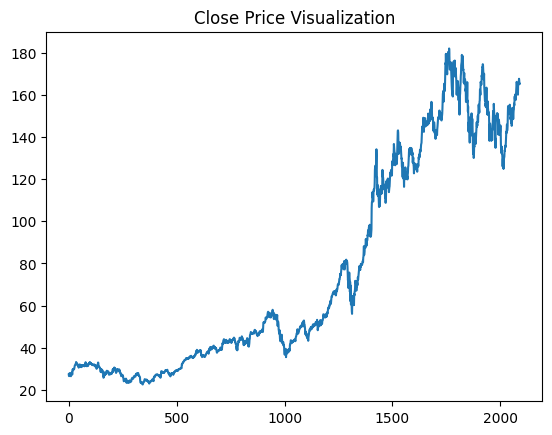

In [5]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [6]:
df

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2086,166.100006,167.410004,165.649994,166.470001,49923000
2087,165.800003,168.160004,165.539993,167.630005,47720200
2088,166.089996,167.869995,165.559998,166.649994,52456400
2089,165.050003,166.449997,164.490005,165.020004,58311900


# Plotting moving averages of 100 day

---



In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2086    147.3198
2087    147.4943
2088    147.6501
2089    147.8192
2090    148.0303
Name: Close, Length: 2091, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

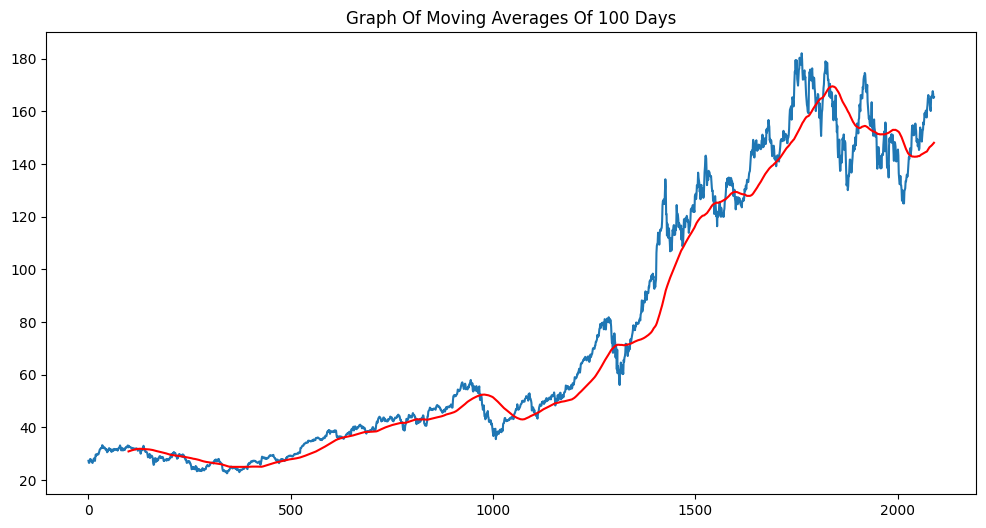

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2086    150.01010
2087    150.15360
2088    150.27905
2089    150.38955
2090    150.48445
Name: Close, Length: 2091, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

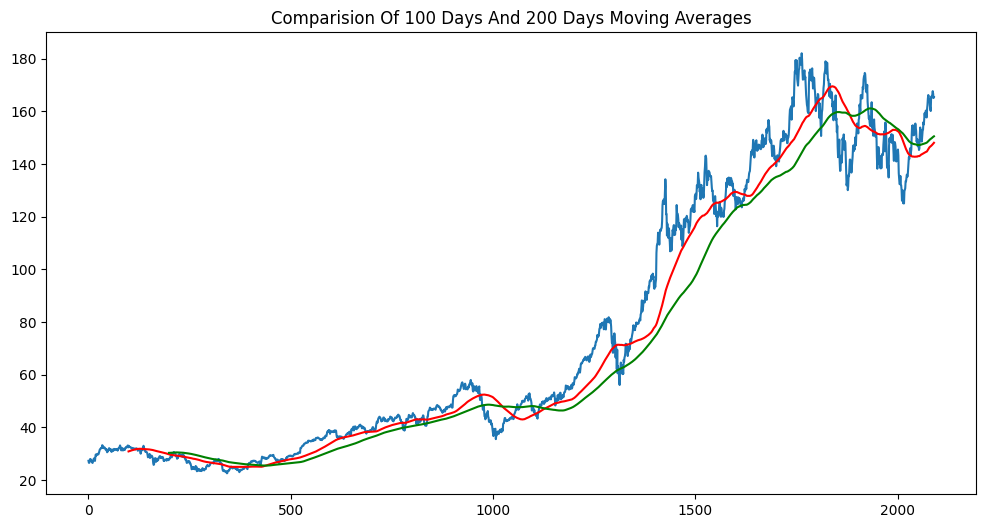

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(2090, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [25]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1463, 7)
(627, 7)


In [26]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565699,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873646,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875893,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210686,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140909,237458000


In [27]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1463,2020-10-23,116.389999,116.550003,114.279999,115.040001,113.306618,82572600
1464,2020-10-26,114.010002,116.550003,112.879997,115.050003,113.316475,111850700
1465,2020-10-27,115.489998,117.279999,114.540001,116.599998,114.843124,92276800
1466,2020-10-28,115.050003,115.430000,111.099998,111.199997,109.524483,143937800
1467,2020-10-29,112.370003,116.930000,112.199997,115.320000,113.582390,146129200


# Using MinMax scaler for normalization of the dataset

---



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [29]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.04254224],
       [0.03564229],
       [0.0356647 ],
       ...,
       [0.85062062],
       [0.8448856 ],
       [0.83484929]])

In [36]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [37]:
x_train.shape

(1363, 100, 1)

# ML Model (LSTM)

---



In [38]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [39]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

# Training the model

---



In [74]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

Epoch 1/50
43/43 [==============================] - 41s 806ms/step - loss: 0.0021 - MAE: 0.0296 - val_loss: 4476.0820 - val_MAE: 64.9403
Epoch 2/50
43/43 [==============================] - 32s 748ms/step - loss: 0.0018 - MAE: 0.0282 - val_loss: 4482.5337 - val_MAE: 64.9902
Epoch 3/50
43/43 [==============================] - 34s 785ms/step - loss: 0.0014 - MAE: 0.0252 - val_loss: 4479.4561 - val_MAE: 64.9685
Epoch 4/50
43/43 [==============================] - 34s 783ms/step - loss: 0.0015 - MAE: 0.0258 - val_loss: 4478.7212 - val_MAE: 64.9634
Epoch 5/50
43/43 [==============================] - 35s 814ms/step - loss: 0.0016 - MAE: 0.0269 - val_loss: 4477.4165 - val_MAE: 64.9535
Epoch 6/50
43/43 [==============================] - 32s 742ms/step - loss: 0.0017 - MAE: 0.0274 - val_loss: 4482.0625 - val_MAE: 64.9908
Epoch 7/50
43/43 [==============================] - 34s 790ms/step - loss: 0.0022 - MAE: 0.0316 - val_loss: 4483.4443 - val_MAE: 64.9972
Epoch 8/50
43/43 [=======================

In [42]:
model.save('keras_model.h5')

In [ ]:

test_close.shape
test_close

In [54]:
past_100_days = pd.DataFrame(train_close[-100:])

In [55]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [56]:
final_df = past_100_days.append(test_df, ignore_index = True)

<ipython-input-56-50640d85f7a0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [58]:
final_df.head()

,0
0,81.279999
1,80.580002
2,82.875000
3,83.364998
4,85.997498


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [60]:
input_data.shape

(727, 1)

# Testing the model

---



In [62]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [64]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(627, 100, 1)
(627,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [65]:
# Making predictions

y_pred = model.predict(x_test)

20/20 [==============================] - 2s 64ms/step


In [66]:
y_pred.shape

(627, 1)

In [67]:
y_test

array([0.33974171, 0.33984032, 0.35512175, 0.30188305, 0.34250222,
       0.27881298, 0.27792563, 0.29439025, 0.33885436, 0.37907917,
       0.37572714, 0.35236124, 0.3489106 , 0.3836143 , 0.38085379,
       0.38134677, 0.39160016, 0.38262842, 0.36922015, 0.37523415,
       0.3624174 , 0.32800946, 0.34102335, 0.34950211, 0.35502314,
       0.37927639, 0.41545896, 0.41900821, 0.41762796, 0.41082521,
       0.42561374, 0.43182489, 0.40619146, 0.42058562, 0.41240269,
       0.40619146, 0.46633145, 0.46564132, 0.47441584, 0.45430351,
       0.46978209, 0.50576759, 0.49669731, 0.50665487, 0.55318944,
       0.53524595, 0.52390815, 0.51375337, 0.48141581, 0.49719014,
       0.45371192, 0.49630287, 0.50744361, 0.47717635, 0.4754018 ,
       0.49600711, 0.4764863 , 0.4590358 , 0.46583854, 0.50724638,
       0.55496399, 0.57665395, 0.61461107, 0.61697729, 0.60613231,
       0.55713298, 0.50655633, 0.52804891, 0.53642914, 0.52607714,
       0.56009072, 0.55387949, 0.55535843, 0.54648523, 0.54037

In [ ]:
y_pred

In [69]:
scaler.scale_

array([0.00985902])

In [70]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

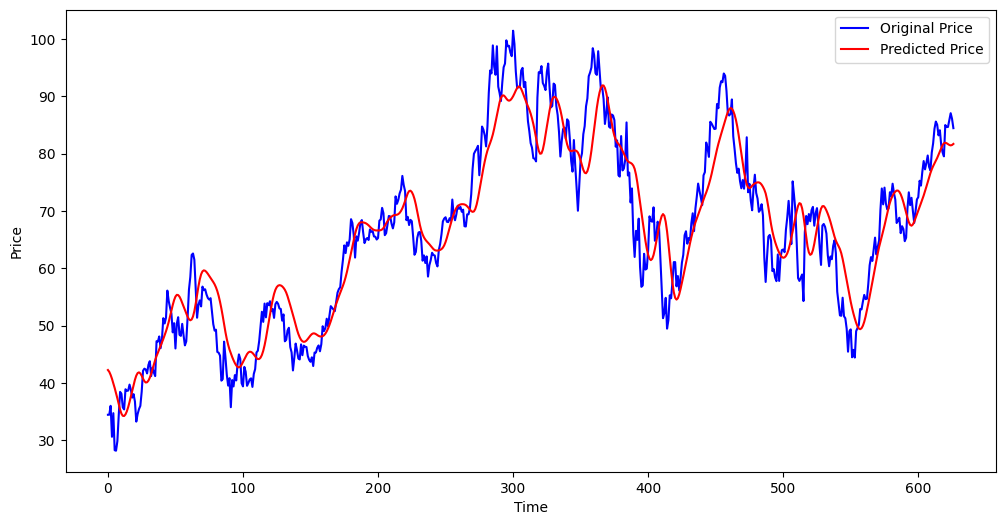

In [71]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [76]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.542532119013522
